<a href="https://colab.research.google.com/github/selinayozbatman/CreditCardSpendingAnalysis/blob/main/CreditCardSpendingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

csv_users = pd.read_csv('/content/users.csv') #The dataset is being loaded.
csv_transactions = pd.read_csv('/content/transactions.csv')

print(csv_users.isnull().sum())
print(csv_transactions.isnull().sum())

csv_users.info()
csv_transactions.info()

csv_users.describe()
csv_transactions.describe()

csv_transactions.duplicated().sum()
csv_users.duplicated().sum()

User                              0
Person                            0
Current Age                       0
Retirement Age                    0
Birth Year                        0
Birth Month                       0
Gender                            0
Address                           0
Apartment                      1472
City                              0
State                             0
Zipcode                           0
Latitude                          0
Longitude                         0
Per Capita Income - Zipcode       0
Yearly Income - Person            0
Total Debt                        0
FICO Score                        0
Num Credit Cards                  0
dtype: int64
User                  0
Card                  0
Year                  0
Month                 0
Day                   0
Time                  0
Amount                0
Use Chip              0
Merchant Name         0
Merchant City         0
Merchant State     1317
Zip                1647
MCC            

np.int64(0)

#Filling missing values

In [3]:
csv_users['Apartment'] = csv_users['Apartment'].fillna(0)

csv_transactions['Merchant State'] = csv_transactions['Merchant State'].fillna("Unknown")
csv_transactions['Zip'] = csv_transactions['Zip'].fillna(0)

#Merging datasets

In [4]:
merged_df = csv_users.merge(csv_transactions, on='User')

#Total spending by Merchant City and bar chart of the Top 10 cities with the highest spending

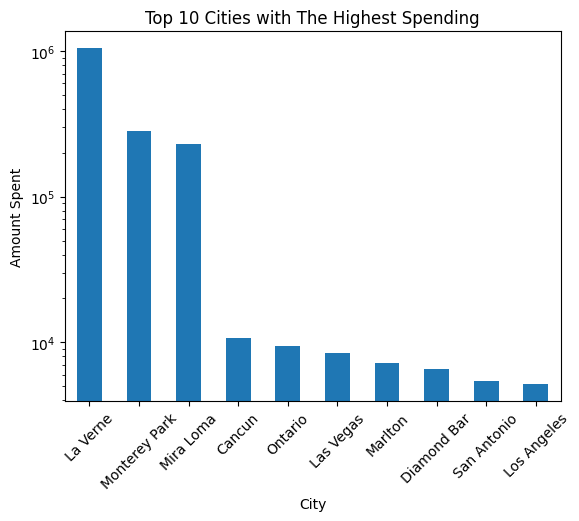

In [5]:
offline_df = merged_df[merged_df['Merchant City'] != 'ONLINE']
sum_amount = offline_df.groupby("Merchant City")["Amount"].sum()

top10_cities = sum_amount.sort_values(ascending=False).head(10)

top10_cities.plot(kind='bar')
plt.title("Top 10 Cities with The Highest Spending")
plt.xlabel("City")
plt.ylabel("Amount Spent")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

###-La Verne shows a significantly higher spending compared to other cities, while the remaining cities have relatively small amounts.

#Line chart of total spending by hour

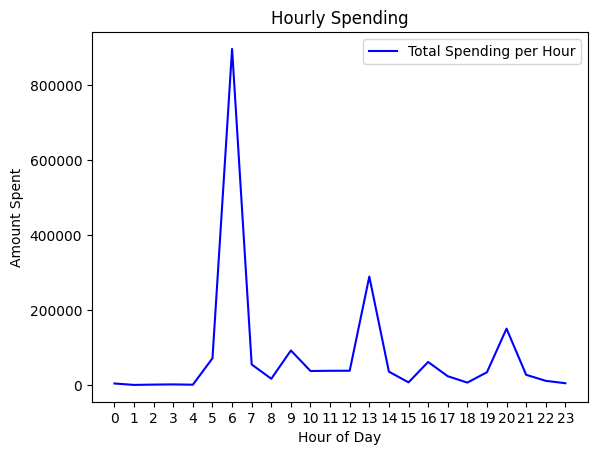

In [6]:
merged_df["Time"] = pd.to_datetime(merged_df["Time"], format = "%H:%M")
merged_df["Hour"] = merged_df["Time"].dt.hour
hourly_sum = merged_df.groupby("Hour")["Amount"].sum() #hourly_sum is a Series

plt.plot(hourly_sum.index, hourly_sum.values, label='Total Spending per Hour', color='blue')
plt.title("Hourly Spending")
plt.xlabel("Hour of Day")
plt.ylabel("Amount Spent")
plt.xticks(range(24))
plt.legend()
plt.show()

###-The chart shows that spending is highly concentrated in certain hours with a major peak around 6 AM and smaller peaks at midday and evening.

#Grouping total spending by gender

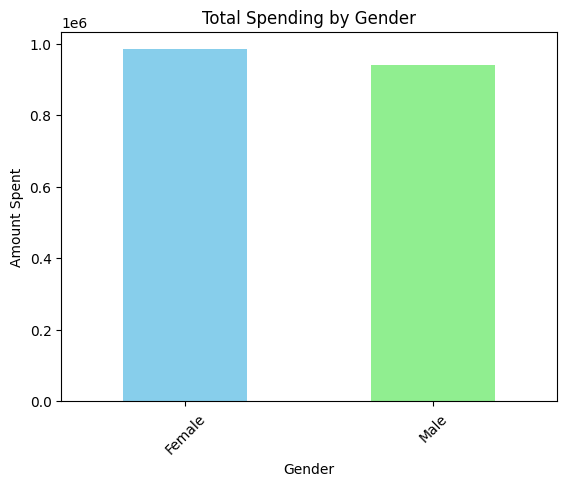

In [36]:
gender_sum = merged_df.groupby("Gender")["Amount"].sum()

gender_sum.plot(kind="bar", color=["skyblue", "lightgreen"])
plt.title("Total Spending by Gender")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.show()

###-The chart shows that female users spent slightly more than male users, but the difference is not significant.

#Yearly Income vs. Spending Amount (Scatter Plot)


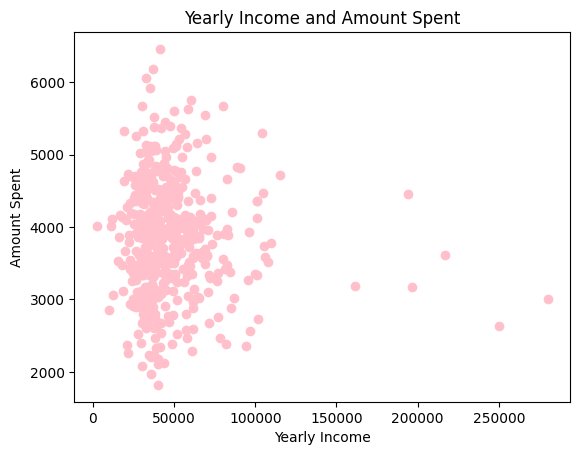

In [26]:
merged_df["Yearly Income - Person"] = merged_df["Yearly Income - Person"].astype(str).str.replace("$", "", regex = False).astype(float)

per_user = (merged_df.groupby("User").agg(TotalAmount=("Amount", "sum"), YearlyIncome=("Yearly Income - Person", "first")))

plt.scatter(per_user["YearlyIncome"], per_user["TotalAmount"], color= "pink", label = "User")
plt.title("Yearly Income and Amount Spent")
plt.xlabel("Yearly Income")
plt.ylabel("Amount Spent")
plt.show()


###-The scatter plot shows that most users fall into lower-to-middle income levels, spending between 2,000 and 6,000. Higher incomes exist but do not higher spending.

#City, time, gender, and income group with the highest spending

In [35]:
highest_city = merged_df.groupby("City")["Amount"].sum().sort_values(ascending=False).head(1)
print("The highest spending city is : " , highest_city.index[0], "with total spending: ", highest_city.values[0])

highest_time = merged_df.groupby("Hour")["Amount"].sum().sort_values(ascending=False).head(1)
print("The highest spending time is : " , highest_time.index[0], "with total spending: ", highest_time.values[0])

highest_gender = merged_df.groupby("Gender")["Amount"].sum().sort_values(ascending=False).head(1)
print("The highest spending gender is : " , highest_gender.index[0], "with total spending: ", highest_gender.values[0])

highest_income = merged_df.groupby("Yearly Income - Person")["Amount"].sum().sort_values(ascending=False).head(1)
print("The highest spending income group is : " , highest_income.index[0], "with total spending: ", highest_income.values[0])


The highest spending city is :  Chicago with total spending:  29234.97
The highest spending time is :  6 with total spending:  897523.69
The highest spending gender is :  Female with total spending:  984753.45
The highest spending income group is :  37785.0 with total spending:  7601.61


#Spending by Age

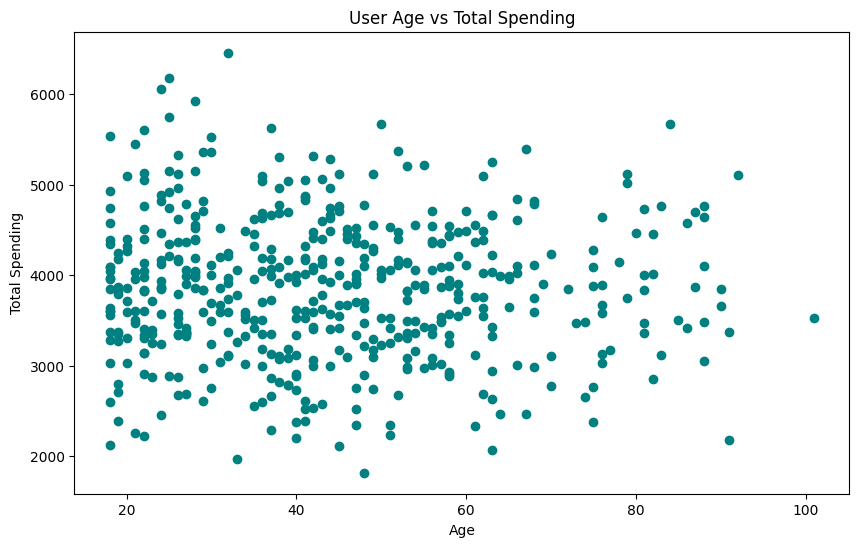

In [38]:
per_user_age = merged_df.groupby("User", as_index=False).agg(TotalAmount=("Amount","sum"),Age=("Current Age","first"))

plt.figure(figsize=(10,6))
plt.scatter(per_user_age["Age"], per_user_age["TotalAmount"], color="teal")
plt.title("User Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.show()

###-The scatter plot shows the points are spread without a clear trend, suggesting that age does not strongly influence total spending.